In [62]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import scipy as sp

### Example

* Suppose we have two samples that represent biki ride durations for two distinct neighborhoods `a` and `b`

1. Instead of working with actual data, sample the data from a gaussian the same mean ($\mu=20$) the same same standard deviation ($\sigma = 4$)
    * We will sample 15 bike rides for each of regions `a` and `b`
    

In [54]:
# Write your code here 
np.random.seed(0)

gaussian_samples = np.random.normal(20, 4, 30)
durations_a = gaussian_samples[0:15]
durations_b = gaussian_samples[15:30]

### Example - cont'd

2. Compute and compare the means of datasets `a` `b`
  * Based on the observed difference between the means, do you believe there is a statistically significant difference between samples `a` and `b`

In [63]:
a_mean = np.mean(durations_a)
b_mean = np.mean(durations_b)

print(f"a: {a_mean}")

print(f"The difference between mean a and mean b is: {a_mean - b_mean}")
print("This is not a statistically significant difference between samples a and b, the value is low relative to the values of the distribution. This is not surprising since they are samples of the same distribution adn should therefore share means of approximately 20.")

The difference between mean a and mean b is: 1.953214960453245
This is not a statistically significant difference between samples a and b, the value is low relative to the values of the distribution. This is not surprising since they are samples of the same distribution adn should therefore share means of approximately 20.


### Example - cont'd

3. draw the two KDEs reprenting the datasets `a` and `b`
  * You should have a figure that appears "approximately" as in the figure below
    * The X- and Y-axis values have been intentionally omitted
    
![](https://www.dropbox.com/s/0ab4d92lkcn89jv/a_b_kde_exmaple.png?dl=1)    

In [105]:
# Write your code here 

x = np.arange(0, 40, 0.1)
a_kde = sp.stats.gaussian_kde(durations_a, bw_method=1)
b_kde = sp.stats.gaussian_kde(durations_b, bw_method=1)

a_pdf = a_kde.evaluate(x)
b_pdf = b_kde.evaluate(x)

Text(0, 0.5, 'Proportion')

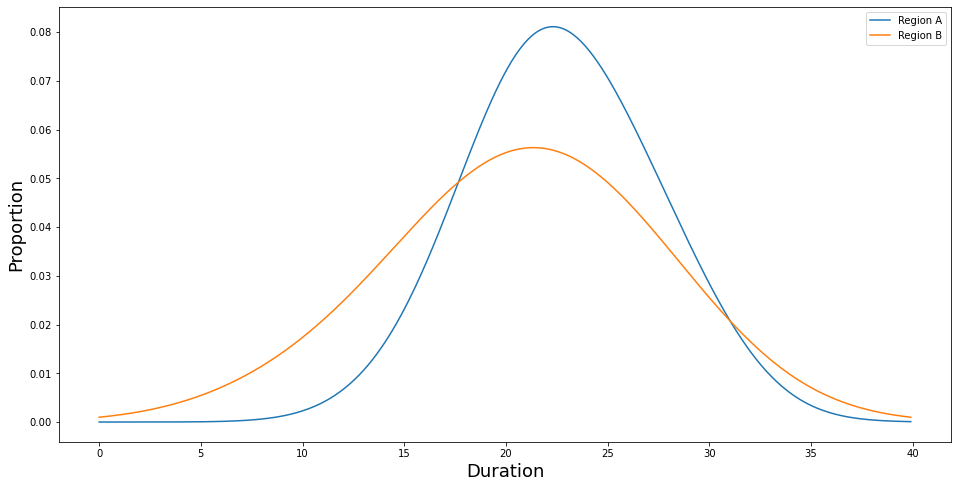

In [106]:
plt.figure(figsize=(16,8))

plt.plot(x, a_pdf, label="Region A")
plt.plot(x, b_pdf, label="Region B")

plt.legend()
plt.xlabel('Duration', fontsize=18)
plt.ylabel('Proportion', fontsize=18)

### Example - cont'd

4. Visually, does dataset *a* differ significantly from dataset `b`

Yes. Visually, dataset a differs from dataset b as though they were two different gaussian curves. Their means are close but their standard deviations and their peaks are different. Region A is taller and narrower. Region B is shorter and wider.

### Example - cont'd

5. Use the resampling method covered in class to test whether or not there is a statistically significant difference between datasets `a` and `b`
 * Provide a p-value to support your claim.


In [182]:
# Write your code here 

diff_arr = []

for _ in np.arange(5000):
    np.random.shuffle(gaussian_samples)
    shuffled_durations_a = gaussian_samples[0:15]
    shuffled_durations_b = gaussian_samples[15:30]
    mean_diff = np.mean(shuffled_durations_a) - np.mean(shuffled_durations_b)
    diff_arr.append(mean_diff)

p_val = sum(diff_arr >= a_mean - b_mean) / len(diff_arr) 

print(f"There is no statistical significance based on our p-value of {p_val}, which is twice as much as the 0.05 threshold for statistical significance")

There is no statistical significance based on our p-value of 0.1128, which is twice as much as the 0.05 threshold for statistical significance


### Example - cont'd

6. Plot a histogram of the means obtained during resampling and the observed value. 
  * You should have a figure that appears "approximately" as in the figure below
![](https://www.dropbox.com/s/g54bal23o1ktj2j/a_b_hist_example.png?dl=1)  

Text(0, 0.5, 'Frequency')

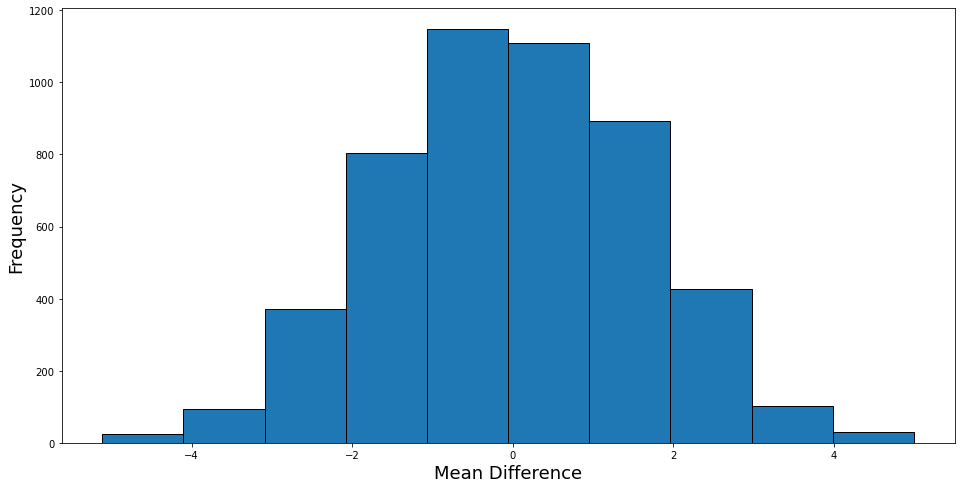

In [184]:
# Write your code here
plt.figure(figsize=(16,8))

plt.hist(diff_arr, edgecolor='black')
plt.xlabel('Mean Difference', fontsize=18)
plt.ylabel('Frequency', fontsize=18)